# Installation and imports


In [1]:
!pip install -q catboost xgboost scikit-learn opendatasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.3 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, f1_score, precision_score,
                             recall_score)
from catboost import CatBoostClassifier
from google.colab import files
import joblib
import warnings
warnings.filterwarnings('ignore')

# Configuration



In [3]:
RANDOM_STATE = 42
TEST_SIZE = 0.2
np.random.seed(RANDOM_STATE)


# Data Loading



In [4]:
data = pd.read_csv('Crop_recommendation.csv')
print(f"Shape: {data.shape}")
print(f"Classes: {data['label'].nunique()}\n")
display(data.head(10))


Shape: (2200, 8)
Classes: 22



,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


# Data Preparation


In [5]:
X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
Y = data['label']

scaler = MinMaxScaler()
encoder = LabelEncoder()

X_scaled = scaler.fit_transform(X)
Y_encoded = encoder.fit_transform(Y)

X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y_encoded,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=Y_encoded
)

print(f"Train samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}\n")


Train samples: 1760
Test samples: 440



# Model Training


In [6]:
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='MultiClass',
    random_seed=RANDOM_STATE,
    verbose=False
)

model.fit(X_train, Y_train)
print("Training completed\n")

Training completed



# Predictions

In [7]:
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='MultiClass',
    random_seed=RANDOM_STATE,
    verbose=False
)

model.fit(X_train, Y_train)
print("Training completed\n")

Training completed



# Performance Metrics



In [10]:
# Predictions
Y_pred_test = model.predict(X_test)
Y_pred_train = model.predict(X_train)

# Accuracy
test_acc = accuracy_score(Y_test, Y_pred_test) * 100
train_acc = accuracy_score(Y_train, Y_pred_train) * 100

# F1-Score
f1_weighted = f1_score(Y_test, Y_pred_test, average='weighted') * 100
f1_macro = f1_score(Y_test, Y_pred_test, average='macro') * 100
f1_micro = f1_score(Y_test, Y_pred_test, average='micro') * 100

# Precision & Recall
precision = precision_score(Y_test, Y_pred_test, average='weighted',
                           zero_division=0) * 100
recall = recall_score(Y_test, Y_pred_test, average='weighted',
                     zero_division=0) * 100

# Cross-validation
cv_scores = cross_val_score(model, X_train, Y_train, cv=5,
                           scoring='accuracy', n_jobs=-1)

print("\nAccuracy:")
print(f"  Test:  {test_acc:.2f}%")
print(f"  Train: {train_acc:.2f}%")
print(f"  CV:    {cv_scores.mean()*100:.2f}% +/- {cv_scores.std()*100:.2f}%")

print("\nF1-Score:")
print(f"  Weighted: {f1_weighted:.2f}%")
print(f"  Macro:    {f1_macro:.2f}%")
print(f"  Micro:    {f1_micro:.2f}%")

print("\nPrecision & Recall:")
print(f"  Precision: {precision:.2f}%")
print(f"  Recall:    {recall:.2f}%")





Accuracy:
  Test:  99.55%
  Train: 100.00%
  CV:    99.26% +/- 0.69%

F1-Score:
  Weighted: 99.55%
  Macro:    99.55%
  Micro:    99.55%

Precision & Recall:
  Precision: 99.57%
  Recall:    99.55%


# Classification Report

In [11]:
print(classification_report(Y_test, Y_pred_test,
                           target_names=encoder.classes_,
                           zero_division=0))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       0.95      1.00      0.98        20
      lentil       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        20
      papaya       1.00    

# Confusion Matrix

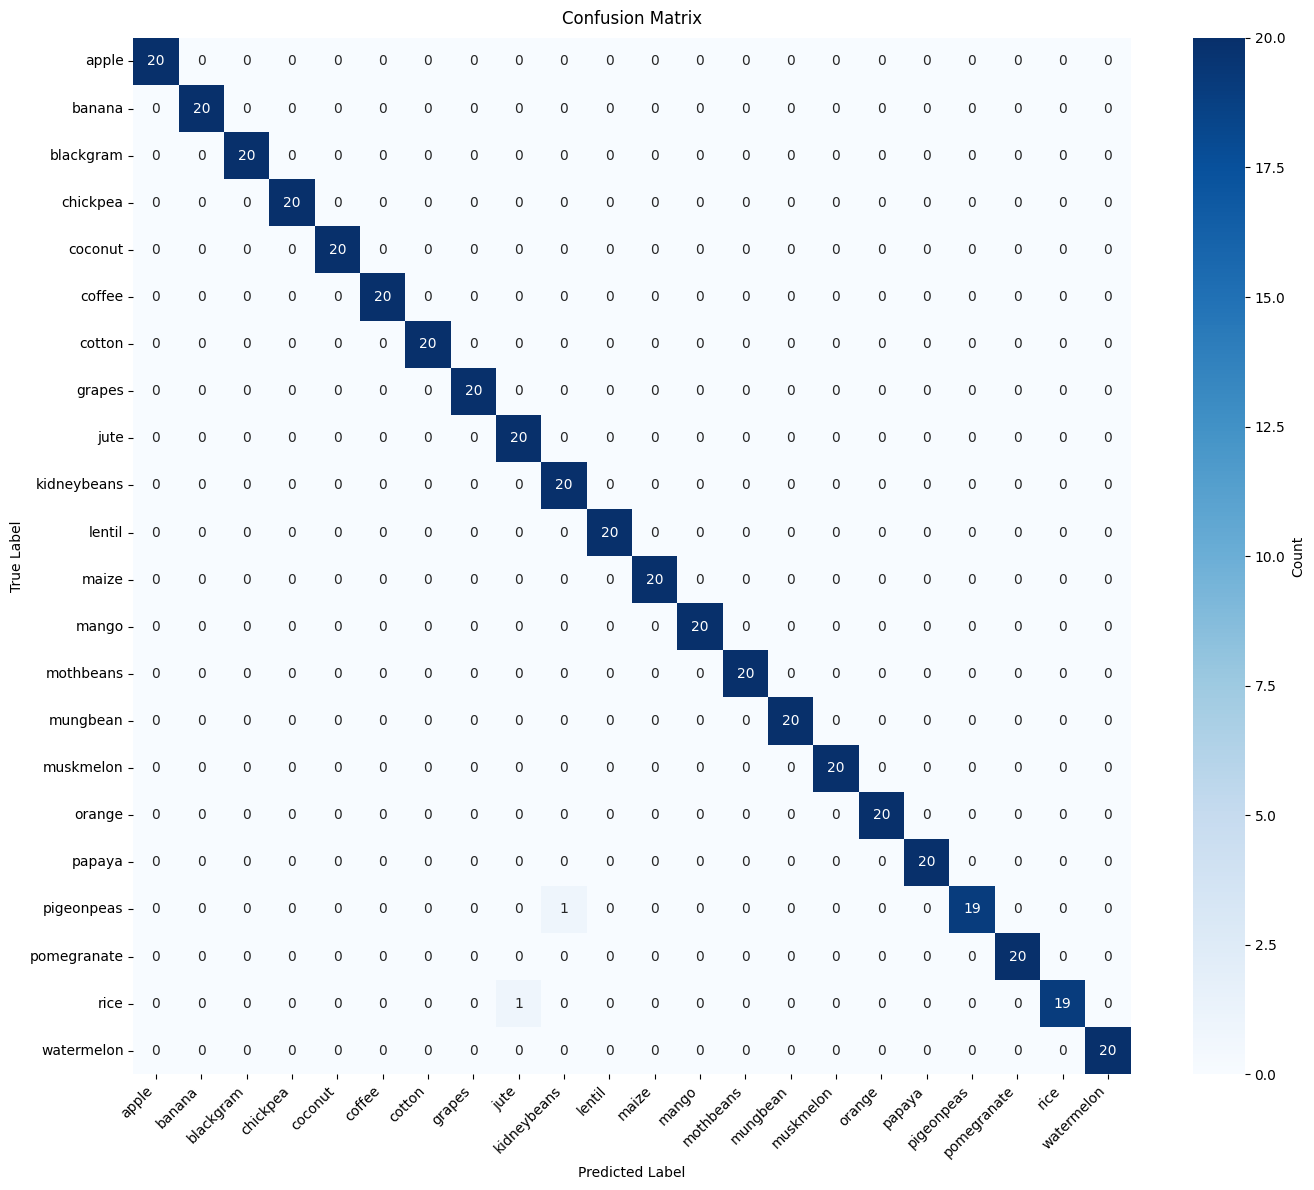

In [12]:
cm = confusion_matrix(Y_test, Y_pred_test)

plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix', fontsize=12, pad=10)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Feature Importance

    Feature  Importance
   humidity   22.946631
          N   18.218817
          K   18.086926
   rainfall   17.158954
          P   15.590846
temperature    6.343755
         ph    1.654073


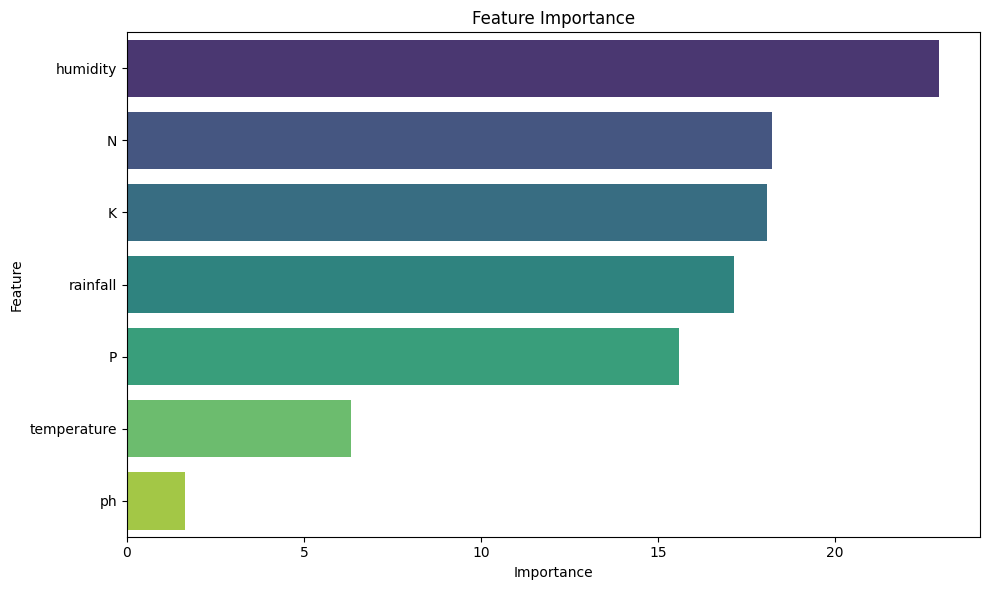

In [13]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance.to_string(index=False))

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature',
           palette='viridis')
plt.title('Feature Importance', fontsize=12)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


# Cross-Validation Visualization

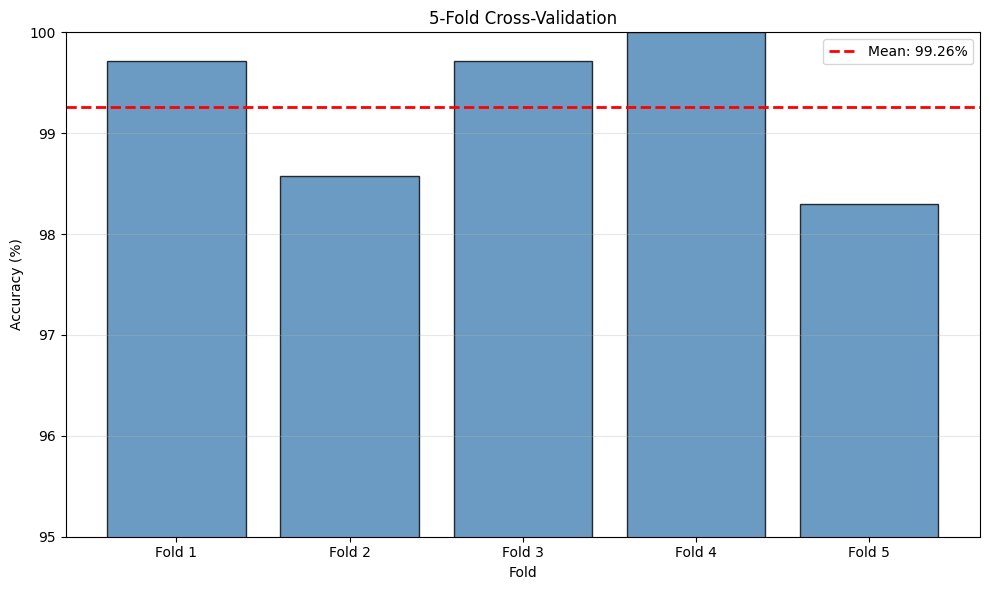

In [14]:
plt.figure(figsize=(10, 6))
folds = [f'Fold {i}' for i in range(1, 6)]
plt.bar(folds, cv_scores*100, color='steelblue', edgecolor='black', alpha=0.8)
plt.axhline(y=cv_scores.mean()*100, color='red', linestyle='--',
           linewidth=2, label=f'Mean: {cv_scores.mean()*100:.2f}%')
plt.xlabel('Fold')
plt.ylabel('Accuracy (%)')
plt.title('5-Fold Cross-Validation', fontsize=12)
plt.ylim(95, 100)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Model saving

In [15]:
joblib.dump(model, 'crop_recommendation_catboost.pkl')
joblib.dump(scaler, 'crop_scaler.pkl')
joblib.dump(encoder, 'crop_encoder.pkl')

print("Saved files:")
print("  - crop_recommendation_catboost.pkl")
print("  - crop_scaler.pkl")
print("  - crop_encoder.pkl")


Saved files:
  - crop_recommendation_catboost.pkl
  - crop_scaler.pkl
  - crop_encoder.pkl


# Summary

In [16]:
summary_data = {
    'Metric': [
        'Test Accuracy',
        'Train Accuracy',
        'F1-Score (Weighted)',
        'F1-Score (Macro)',
        'Precision',
        'Recall',
        'CV Mean',
        'CV Std'
    ],
    'Value': [
        f'{test_acc:.2f}%',
        f'{train_acc:.2f}%',
        f'{f1_weighted:.2f}%',
        f'{f1_macro:.2f}%',
        f'{precision:.2f}%',
        f'{recall:.2f}%',
        f'{cv_scores.mean()*100:.2f}%',
        f'{cv_scores.std()*100:.2f}%'
    ]
}

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

print("\n" + "=" * 80)

# Model download
print("\nDownloading models...")
files.download('crop_recommendation_catboost.pkl')
files.download('crop_scaler.pkl')
files.download('crop_encoder.pkl')
print("Download completed")


             Metric   Value
      Test Accuracy  99.55%
     Train Accuracy 100.00%
F1-Score (Weighted)  99.55%
   F1-Score (Macro)  99.55%
          Precision  99.57%
             Recall  99.55%
            CV Mean  99.26%
             CV Std   0.69%




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download completed
